# Importing Necessary Packages

In [1]:
# Data analysis and wrangling

import pandas as pd
import numpy as np

# Data visualisation

import matplotlib.pyplot as plt
# Shows plots in jupyter notebook
%matplotlib inline

import seaborn as sns
# Set plot style
sns.set(color_codes=True)


# Dates
from datetime import datetime

#remove warnings

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## 1. Importing Data

In [2]:
edadata = pd.read_csv('clean_eda_data.csv')
edadata.head()

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


In [5]:
edadata["date_activ"] = pd.to_datetime(edadata["date_activ"], format='%Y-%m-%d')
edadata["date_end"] = pd.to_datetime(edadata["date_end"], format='%Y-%m-%d')
edadata["date_modif_prod"] = pd.to_datetime(edadata["date_modif_prod"], format='%Y-%m-%d')
edadata["date_renewal"] = pd.to_datetime(edadata["date_renewal"], format='%Y-%m-%d')

edadata.drop(edadata.columns[0], axis=1, inplace=True)
edadata.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


### Feature Engineering

In [6]:
price_data = pd.read_csv('price_data.csv')
price_data["price_date"] = pd.to_datetime(price_data["price_date"], format='%Y-%m-%d')
price_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [7]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_data.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 
                                                                    'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(

    dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), 
    jan_prices.drop(columns='price_date'), on='id'
)
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]

diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [8]:
edadata = pd.merge(edadata, diff, on='id')
edadata.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0,-0.006192,0.162916


### Average price changes as time passes

In [9]:
# Aggregate average prices per period by company
mean_prices = price_data.groupby(['id']).agg({'price_off_peak_var': 'mean', 'price_peak_var': 'mean', 
                                              'price_mid_peak_var': 'mean', 'price_off_peak_fix': 'mean', 
                                              'price_peak_fix': 'mean', 'price_mid_peak_fix': 'mean'}).reset_index()

In [10]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [12]:
columns = ['id', 'off_peak_peak_var_mean_diff', 'peak_mid_peak_var_mean_diff', 'off_peak_mid_peak_var_mean_diff', 
           'off_peak_peak_fix_mean_diff', 'peak_mid_peak_fix_mean_diff', 'off_peak_mid_peak_fix_mean_diff']

edadata = pd.merge(edadata, mean_prices[columns], on='id')
edadata.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,8.182687,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,16.365274,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893


This feature could be valuable as it builds on the useful insights discovered by my colleague, adding more granularity. We now have features that examine mean price disparities across different time periods (off_peak, peak, mid_peak), rather than just looking at annual differences. While features comparing different time periods within a year may uncover smaller-scale patterns between months, the Dec-Jan feature might highlight broader macro trends that occur over the entire yea

### Max price changes across periods and months

In [13]:
# Aggregate average prices per period by company
mean_prices_by_month = price_data.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 
                                                                     'price_peak_var': 'mean', 
                                                                     'price_mid_peak_var': 'mean', 
                                                                     'price_off_peak_fix': 'mean', 
                                                                     'price_peak_fix': 'mean', 
                                                                     'price_mid_peak_fix': 'mean'}).reset_index()

In [14]:
# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [15]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [17]:
columns = ['id', 'off_peak_peak_var_max_monthly_diff', 'peak_mid_peak_var_max_monthly_diff', 
           'off_peak_mid_peak_var_max_monthly_diff', 'off_peak_peak_fix_max_monthly_diff', 
           'peak_mid_peak_fix_max_monthly_diff', 'off_peak_mid_peak_fix_max_monthly_diff']

edadata = pd.merge(edadata, max_diff_across_periods_months[columns], on='id')
edadata.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.058257,18.590255,7.450670,26.040925,0.060550,0.085483,0.146033,44.266930,8.145775,44.26693
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.149609,44.311375,0.000000,44.311375,0.151367,0.085483,0.151367,44.444710,0.000000,44.44471
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.170512,44.385450,0.000000,44.385450,0.084587,0.089162,0.172468,44.444710,0.000000,44.44471
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.151210,44.400265,0.000000,44.400265,0.153133,0.000000,0.153133,44.444710,0.000000,44.44471
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.051309,16.275263,8.137629,24.412893,0.022225,0.033743,0.055866,16.291555,8.145775,24.43733


To better understand the perspective of a PowerCo client, I thought it would be valuable to create a feature that calculates the maximum price change across months and time periods. As a utility customer, nothing is more frustrating than unexpected price hikes between months, and a sharp price increase in a short period could motivate me to look for better deals with other providers. Since our goal is to predict churn, I believed integrating this feature could offer useful insights

## Bonus
#### Tenure

In [18]:
edadata['tenure'] = ((edadata['date_end'] - edadata['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

In [19]:
edadata.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

,churn
tenure,
3,0.143836
2,0.133080
4,0.125756
13,0.095238
5,0.085425
12,0.083333
6,0.080713
7,0.073394
11,0.063584


As we observe, clients who have been with us for four months or less are significantly more likely to churn compared to those who have been with us for a longer period. Interestingly, the difference in churn risk between clients who have been with us for 4 months and those who have been with us for 5 months is around 4%, which indicates a notable increase in the likelihood of a client leaving. This suggests that retaining a customer past the 4-month mark is a key milestone in keeping them as a long-term client.

This feature is valuable for modeling because it clearly shows that the length of time a client has been with us plays a significant role in predicting the likelihood of churn.

#### Transforming dates into months
- Months_activ = Number of months active until reference date (Jan 2016)
- Months_to_end = Number of months of the contract left until reference date (Jan 2016)
- Months_modif_prod = Number of months since last modification until reference date (Jan 2016)
- Months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [20]:
def convert_months(reference_date, edadata, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - edadata[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [21]:
# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
edadata['months_activ'] = convert_months(reference_date, edadata, 'date_activ')
edadata['months_to_end'] = -convert_months(reference_date, edadata, 'date_end')
edadata['months_modif_prod'] = convert_months(reference_date, edadata, 'date_modif_prod')
edadata['months_renewal'] = convert_months(reference_date, edadata, 'date_renewal')

In [22]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them

remove = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

edadata = edadata.drop(columns=remove)
edadata.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,0.085483,0.146033,44.266930,8.145775,44.26693,3,30,5,2,6
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,...,0.085483,0.151367,44.444710,0.000000,44.44471,7,76,7,76,4
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,0.089162,0.172468,44.444710,0.000000,44.44471,6,68,3,68,8
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,...,0.000000,0.153133,44.444710,0.000000,44.44471,6,69,2,69,9
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,...,0.033743,0.055866,16.291555,8.145775,24.43733,6,71,2,71,9


### Transforming Boolean data

In [23]:
edadata['has_gas'] = edadata['has_gas'].replace(['t', 'f'], [1, 0])
edadata.groupby(['has_gas']).agg({'churn': 'mean'})

,churn
has_gas,
0,0.100544
1,0.081887


When a customer also purchases gas from PowerCo, it suggests they are a loyal customer who uses multiple services. As expected, customers who do not purchase gas are approximately 2% more likely to churn compared to those who do. Therefore, this feature is valuable for predicting churn.

### Transforming Caterogical Data
A predictive model cannot process categorical or string values directly, so as data scientists, we need to convert categorical features into numerical representations in the most compact and informative way possible.

One simple approach is label encoding, where each category is mapped to an integer. However, this method can be inappropriate because it introduces an artificial order to the feature (e.g., 0 < 1 < 2 < 3...), which may not actually exist in the data.

Another approach is using dummy variables, also known as one-hot encoding. This creates a new binary feature for each unique value in a categorical column, filling it with 1 or 0 to indicate whether a given record belongs to that category.

#### Channel Sales

In [24]:
# Transform into categorical type
edadata['channel_sales'] = edadata['channel_sales'].astype('category')

# Let's see how many categories are within this column
print("\n ----- Value Counts of Channel Sales ----- \n")
edadata['channel_sales'].value_counts()


 ----- Value Counts of Channel Sales ----- 



foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

We have 8 categories, so we will generate 8 dummy variables from this column. However, as seen in the output, the last three categories have only 11, 3, and 2 occurrences, respectively. These categories are nearly constant and contribute very little to the model. Then we will drop 3 dummy variabels.

In [25]:
edadata = pd.get_dummies(edadata, columns=['channel_sales'], prefix='channel')
edadata = edadata.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 
                                  'channel_epumfxlbckeskwekxbiuasklxalciiuu', 
                                  'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
edadata.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,3,30,5,2,6,0,0,1,0,0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,7,76,7,76,4,1,0,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,6,68,3,68,8,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,6,69,2,69,9,0,0,0,1,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,6,71,2,71,9,1,0,0,0,0


#### Origin Up

In [26]:
# Transform into categorical type
edadata['origin_up'] = edadata['origin_up'].astype('category')

# Let's see how many categories are within this column
print("\n ----- Value Counts of Origin Up ----- \n")
edadata['origin_up'].value_counts()


 ----- Value Counts of Origin Up ----- 



lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

Similar to channel_sales, the last three categories in the output above have very low frequencies, so we will remove them from the features after creating the dummy variables.

In [27]:
edadata = pd.get_dummies(edadata, columns=['origin_up'], prefix='origin_up')
edadata = edadata.drop(columns=['origin_up_MISSING', 
                      'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 
                      'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
edadata.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,71,9,1,0,0,0,0,1,0,0


### Transforming numerical data

In [28]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

print("\n ----- Statistical Summary of Skewed ----- \n")
edadata[skewed].describe().T


 ----- Statistical Summary of Skewed ----- 



,count,mean,std,min,25%,50%,75%,max
cons_12m,14605.0,159230.267032,573483.629064,0.0,5674.000000,14116.000000,40764.000000,6.207104e+06
cons_gas_12m,14605.0,28091.082506,162978.563803,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14605.0,16091.371448,64366.262314,0.0,0.000000,793.000000,3383.000000,7.712030e+05
forecast_cons_12m,14605.0,1868.638618,2387.651549,0.0,494.980000,1112.610000,2402.270000,8.290283e+04
forecast_cons_year,14605.0,1399.858747,3247.876793,0.0,0.000000,314.000000,1746.000000,1.753750e+05
forecast_discount_energy,14605.0,0.966450,5.108355,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14605.0,63.090448,66.166636,0.0,16.180000,18.800000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14605.0,0.137282,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14605.0,0.050488,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14605.0,43.130085,4.486140,0.0,40.606701,44.311378,44.311378,5.926638e+01


From the result, we can see that the standard deviation for most of these features is quite high.

In [29]:
### Applying log10 transformation

edadata["cons_12m"] = np.log10(edadata["cons_12m"] + 1)
edadata["cons_gas_12m"] = np.log10(edadata["cons_gas_12m"] + 1)
edadata["cons_last_month"] = np.log10(edadata["cons_last_month"] + 1)
edadata["forecast_cons_12m"] = np.log10(edadata["forecast_cons_12m"] + 1)
edadata["forecast_cons_year"] = np.log10(edadata["forecast_cons_year"] + 1)
edadata["forecast_meter_rent_12m"] = np.log10(edadata["forecast_meter_rent_12m"] + 1)
edadata["imp_cons"] = np.log10(edadata["imp_cons"] + 1)

### Checking the statistics of the skewed features

In [30]:
print("\n ----- Statistical Summary of Skewed ----- \n")
edadata[skewed].describe().T


 ----- Statistical Summary of Skewed ----- 



,count,mean,std,min,25%,50%,75%,max
cons_12m,14605.0,4.223945,0.884545,0.0,3.753966,4.149742,4.610287,6.792889
cons_gas_12m,14605.0,0.778978,1.716828,0.0,0.000000,0.000000,0.000000,6.618528
cons_last_month,14605.0,2.264801,1.769266,0.0,0.000000,2.899821,3.529430,5.887169
forecast_cons_12m,14605.0,2.962162,0.683612,0.0,2.695464,3.046733,3.380803,4.918575
forecast_cons_year,14605.0,1.784733,1.584972,0.0,0.000000,2.498311,3.242293,5.243970
forecast_discount_energy,14605.0,0.966450,5.108355,0.0,0.000000,0.000000,0.000000,30.000000
forecast_meter_rent_12m,14605.0,1.517233,0.571489,0.0,1.235023,1.296665,2.120673,2.778376
forecast_price_energy_off_peak,14605.0,0.137282,0.024623,0.0,0.116340,0.143166,0.146348,0.273963
forecast_price_energy_peak,14605.0,0.050488,0.049037,0.0,0.000000,0.084138,0.098837,0.195975
forecast_price_pow_off_peak,14605.0,43.130085,4.486140,0.0,40.606701,44.311378,44.311378,59.266378


Now we can see that for the majority of the features, their standard deviation is much lower after transformation. This is a good thing, it shows that these features are more stable and predictable now

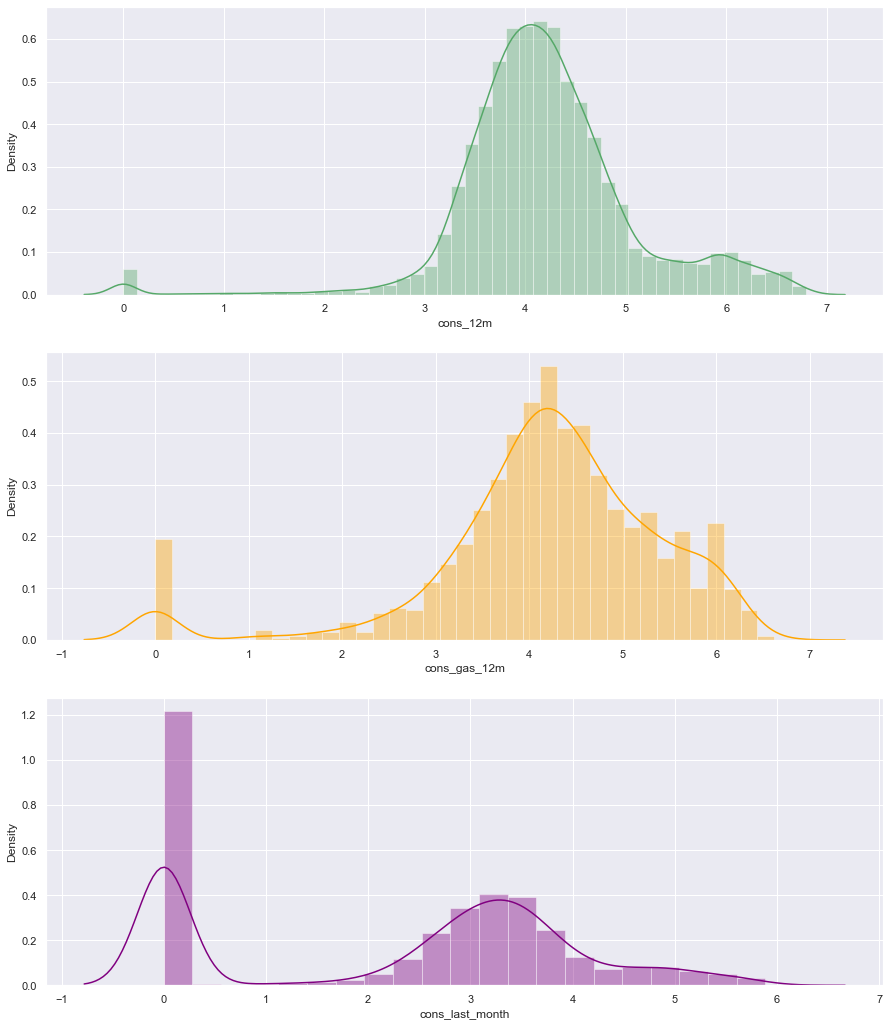

In [31]:
fig, axs = plt.subplots(nrows=3, figsize=(15, 18))
# Plot histograms
sns.distplot((edadata["cons_12m"].dropna()), ax=axs[0], color='g')
sns.distplot((edadata[edadata["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1], color='orange')
sns.distplot((edadata["cons_last_month"].dropna()), ax=axs[2], color='purple')

plt.show()

## Checking Correlations of Variables

In [32]:
correlation = edadata.corr()

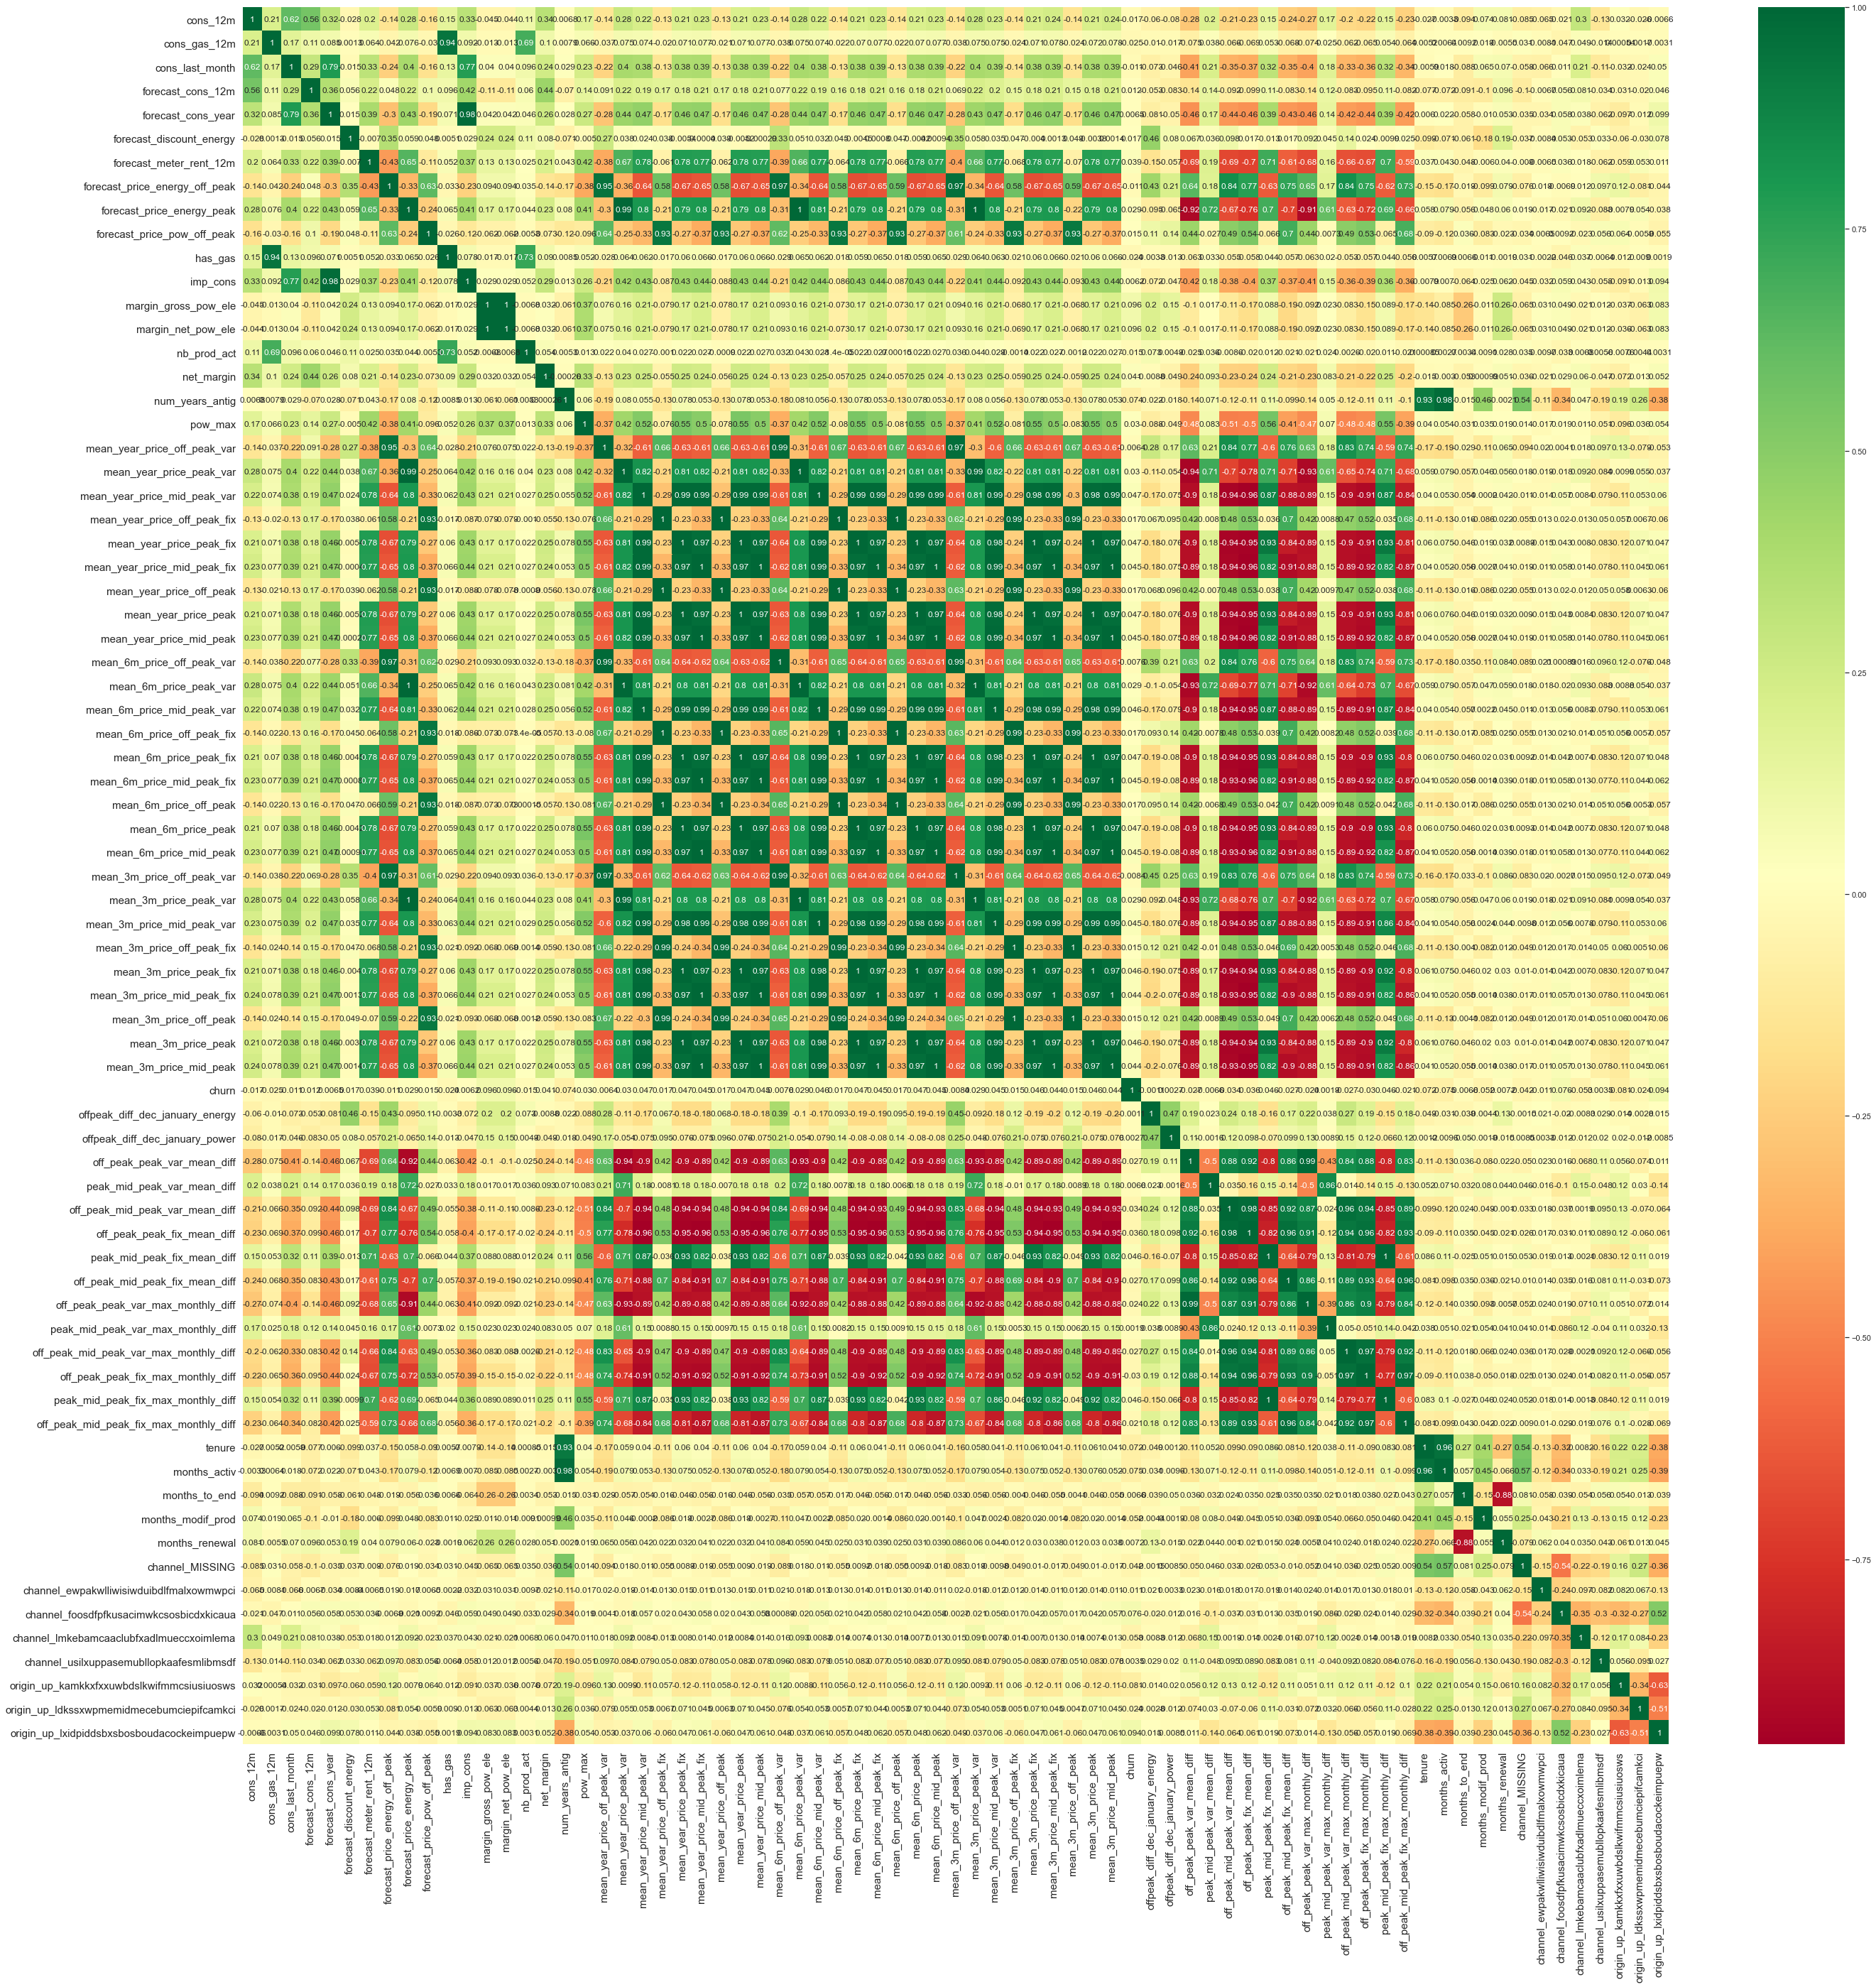

In [33]:
# Correlation Heatmap

plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}, 
    cmap='RdYlGn'
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# View of graph
plt.show()

We will remove two variables(num_years_antig and forecast_cons_year) which exhibit a high correlation with other independent features

In [34]:
edadata = edadata.drop(columns=['num_years_antig', 'forecast_cons_year'])
edadata.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


## Building Prediction Model using Random Forest Classifier

In [38]:
# Make a copy of our data
train_df = edadata.copy()

# Separate target variable from independent variables
X = edadata.drop(columns=['id', 'churn'])
Y = edadata['churn']

In [39]:
X

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,1,...,2,6,0,0,1,0,0,0,0,1
1,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,0,...,76,4,1,0,0,0,0,1,0,0
2,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,0,...,68,8,0,0,1,0,0,1,0,0
3,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,0,...,69,9,0,0,0,1,0,1,0,0
4,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,0,...,71,9,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14600,4.508812,4.680707,0.000000,3.667360,0.0,1.291591,0.138305,0.000000,44.311378,1,...,7,19,0,0,1,0,0,0,0,1
14601,3.858778,0.000000,2.260071,2.801191,0.0,2.161458,0.100167,0.091892,58.995952,0,...,40,4,0,0,1,0,0,0,0,1
14602,3.265996,0.000000,2.255273,2.281919,0.0,2.115943,0.116900,0.100015,40.606701,0,...,46,10,0,0,1,0,0,0,0,1
14603,2.120574,0.000000,0.000000,1.308351,0.0,0.912753,0.145711,0.000000,44.311378,0,...,40,4,0,0,1,0,0,0,0,1


In [40]:
Y

0        1
1        0
2        0
3        0
4        0
        ..
14600    0
14601    1
14602    1
14603    0
14604    0
Name: churn, Length: 14605, dtype: int64

Dividing the Data as 75% for training and 25% for test data

In [41]:
print(X.shape)
print(Y.shape)

(14605, 70)
(14605,)


In [42]:
## Split data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

### Checking shape of train and test data

In [43]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(10953, 70)
(10953,)
(3652, 70)
(3652,)


### Random Forest Classifier
we will use a Random Forest classifier, which is an ensemble algorithm. A Random Forest consists of multiple Decision Trees, which are tree-based learning models. As data scientists, we can control the size of the forest by choosing how many decision trees to include.

The strength of ensemble algorithms comes from averaging, weak learners, and the central limit theorem. If we take a single decision tree, train it on a dataset with specific parameters, it will learn patterns, but it might either overfit or underfit the data, leaving us with just that one model's result.

With ensemble methods, we train thousands of decision trees, each using different data splits and learning distinct patterns. It's like asking 1000 people to learn how to code—each one will come up with a different answer and method. The idea of weak learners applies here as well. By training these learners to capture weak patterns in the data (and avoiding overfitting), they combine their knowledge to form a highly predictive model. This is a real-world example of how many minds working together can outperform one.

Instead of relying on a single decision tree, the Random Forest takes the collective input of all the trees. Some ensemble algorithms use a voting mechanism to select the best prediction, while others use averaging.

As we increase the number of learners (decision trees), the Random Forest's performance should improve and eventually converge toward the best possible result.

<b>Some additional advantages of the random forest classifier include:</b>
- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

<b>On the flip side, some disadvantages of the random forest classifier include:</b>
- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

n_estimatore = 1000, it means the random forest will consist of 1.000 decision trees

### Model prediction on X_test data

In [45]:
## prediction of test data
Y_pred = rf_classifier.predict(X_test)
Y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Importing Model Evaluation Metrics

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

#### Model Accuracy Score

In [47]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy score:- ", accuracy)
print("\n ----- Classification Report ----- \n")
print(classification_report(Y_test, Y_pred))

Accuracy score:-  0.9033406352683461

 ----- Classification Report ----- 

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3279
           1       0.92      0.06      0.11       373

    accuracy                           0.90      3652
   macro avg       0.91      0.53      0.53      3652
weighted avg       0.90      0.90      0.86      3652



#### Confusion Matrix

[[3277    2]
 [ 351   22]]


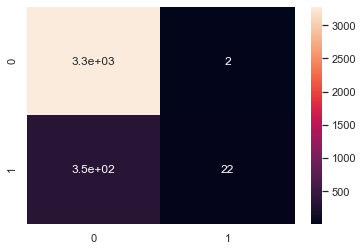

In [48]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

sns.heatmap(cm, annot=True)
plt.show()

### Precision

In [49]:
print("Precision Score is - ", precision_score(Y_test, Y_pred))

Precision Score is -  0.9166666666666666


### Recall

In [50]:
print("Recall Score is - ", recall_score(Y_test, Y_pred))

Recall Score is -  0.058981233243967826


### F1 Score

In [51]:
print("F1 Score is - ", f1_score(Y_test, Y_pred))

F1 Score is -  0.11083123425692695


### ROC/AUC

In [52]:
auc = roc_auc_score(Y_test, Y_pred)
print("AUC score:- ", auc)

AUC score:-  0.5291856455942316


### ROC Curve

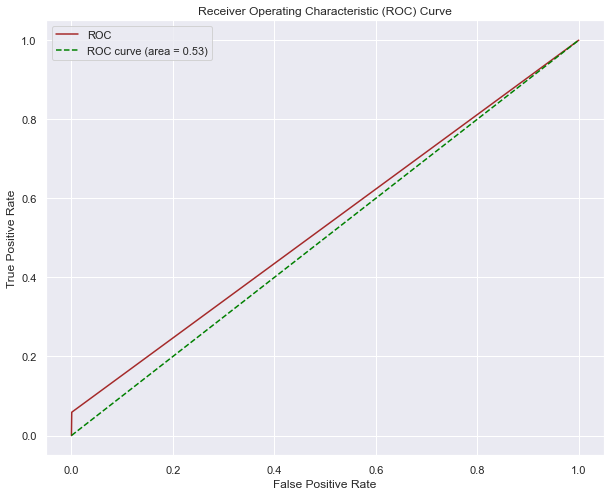

In [53]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='brown', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### K-Fold Cross Validation

In [54]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_classifier, X_train, Y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(cv_scores))

Cross-validation scores:[0.90643542 0.91282519 0.90871748 0.90684932 0.90684932]


### Summarize the cross-validation accuracy by calculating its mean

In [55]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(cv_scores.mean()))

Average cross-validation score: 0.9083


##### MODEL EVALUATION SUMMARY :

                        Model Accuracy : 0.9033
                        Precision      : 0.9166
                        Recall         : 0.0589
                        F1 Score       : 0.1108
                        AUC            : 0.5291
                        K-Fold         : 0.9083

### Model Understanding
Examining `feature_importances` is a quick and straightforward way to understand a model's outcomes. There are different techniques for calculating feature importance, but with the Random Forest classifier, we can retrieve `feature_importances` directly using the built-in method from the trained model. These `feature_importances` show the significance of each feature in the model's predictions. In the Random Forest context, they represent how often each feature is used to make splits across all trees in the forest.

In [56]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

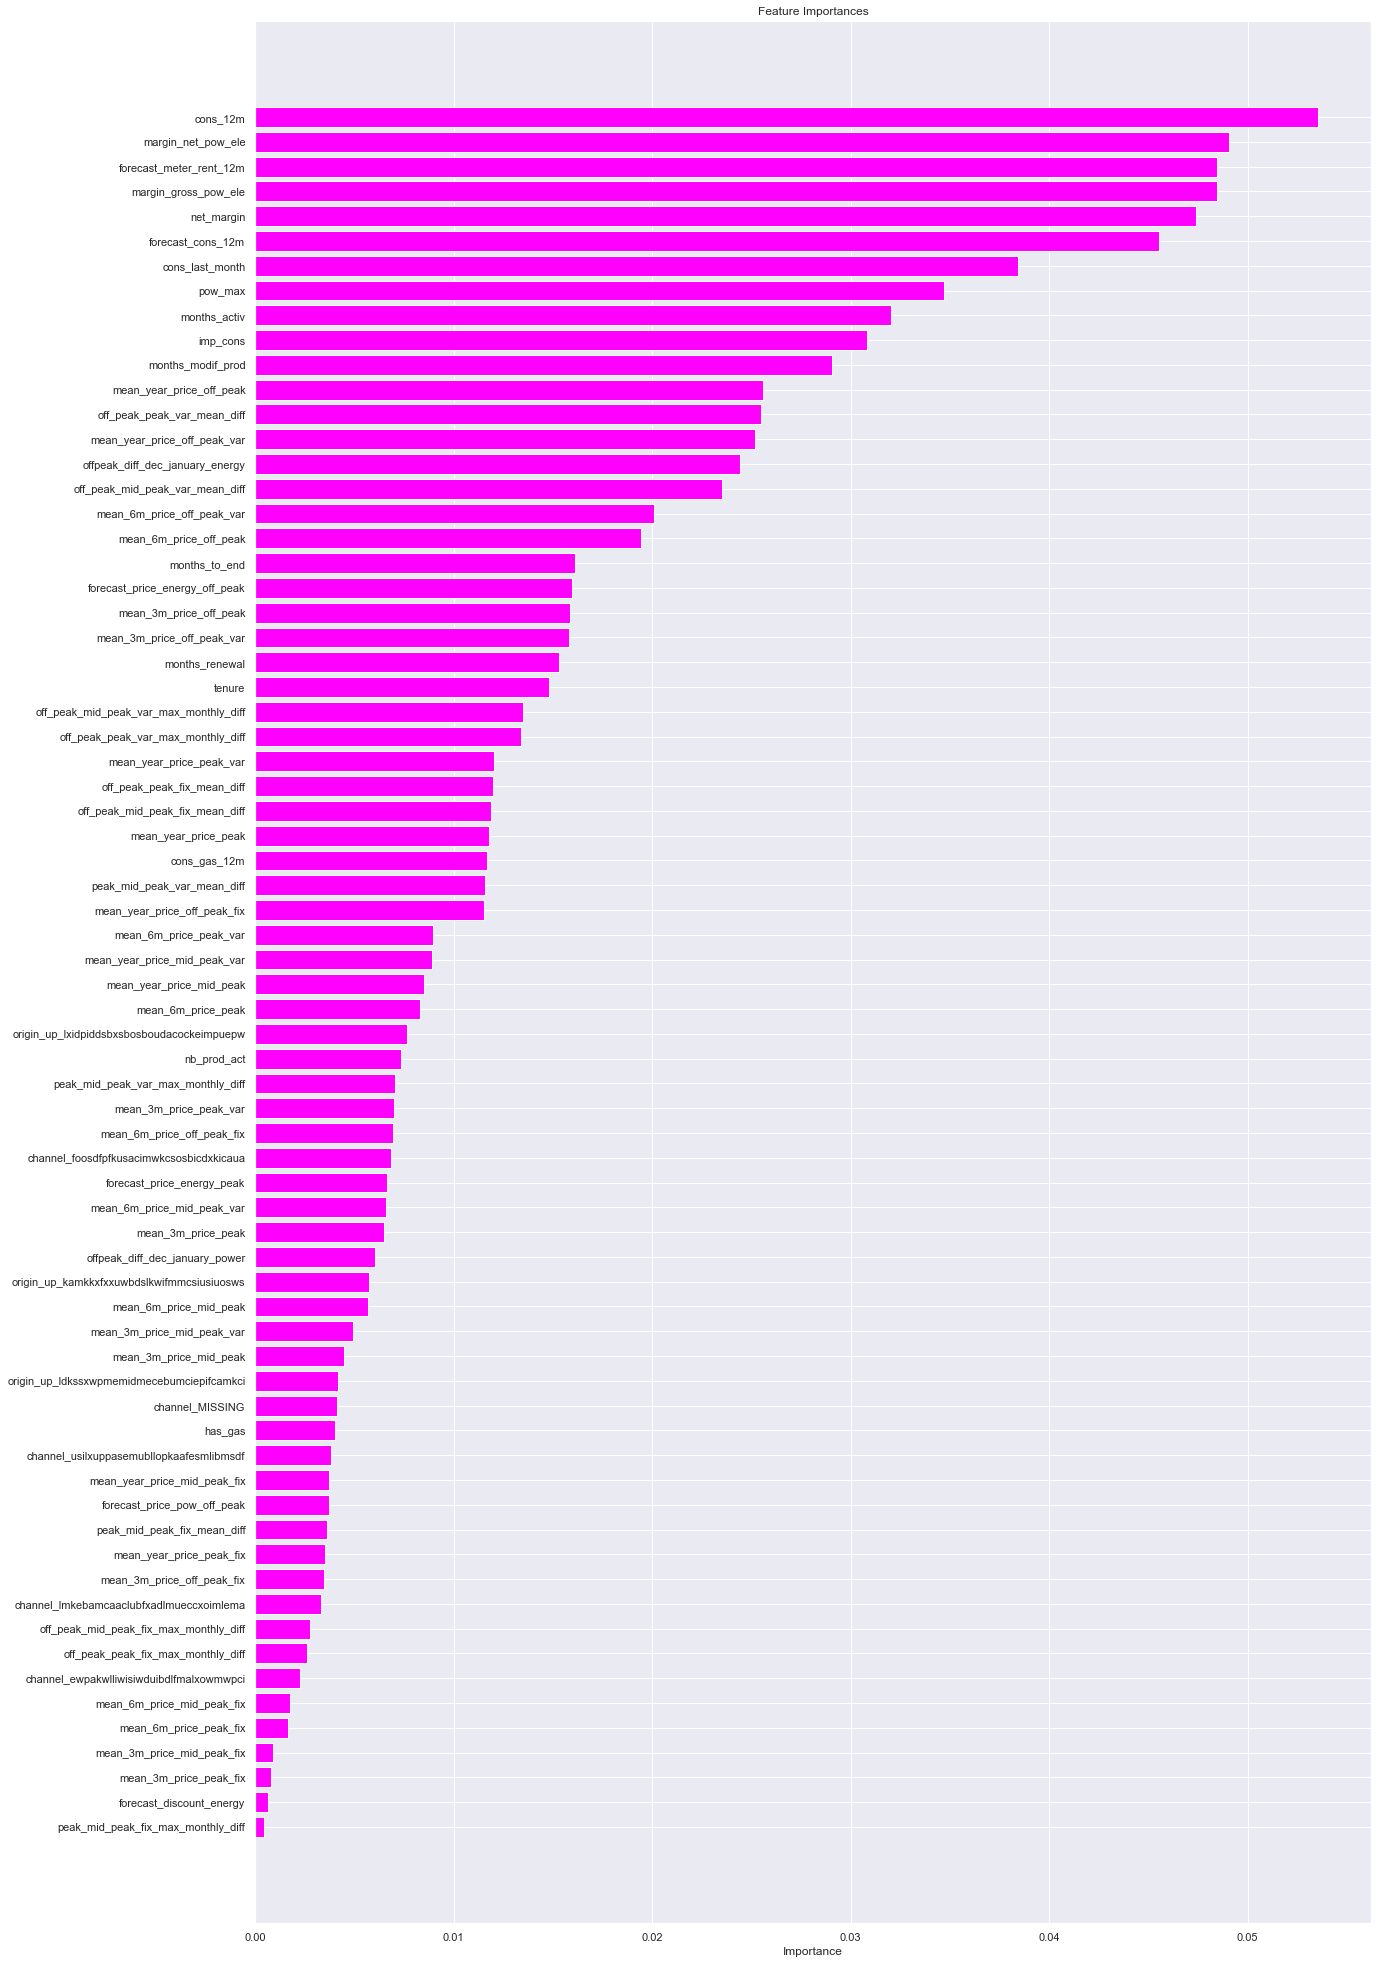

In [58]:
plt.figure(figsize=(20, 35))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='magenta', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From this chart, we can note the following:

- The net margin on power subscriptions and consumption over the past 12 months are key contributors to churn in this model.
- The forecasted meter rental bill for the next two months also plays a significant role.
- Time-related factors appear to be important, particularly the number of months a customer has been active, their tenure, and the time since their last contract update.
- The feature suggested by our colleague ranks in the top half in terms of influence, and some derived features outperform it.
- Price sensitivity features are dispersed and are not the primary drivers of churn.

The last observation is important because this relates back to our original hypothesis:

    > Is churn driven by the customers' price sensitivity?

Based on the output of the feature importances, it is not a main driver but it is a weak contributor. However, to arrive at a conclusive result, more experimentation is needed.

In [59]:
proba_predictions = rf_classifier.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [60]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

### Saving the dataframe to "predicted_data.csv" file

In [62]:
X_test['churn'] = Y_pred.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('predicted_data.csv')

# Business impact of discount

We perform a brief analysis of the proposed discount strategy, which is just one possible solution, and there may be many other approaches.

The SME division head has proposed offering a 20% discount to customers with a high likelihood of churning. For this analysis, we will assume that all customers who are offered the discount will accept it.

## Workflow
Our task is to calculate the forecast revenue for the set of customers:
1. When no discount is offered
2. And when a discount is offered based on a probability cutoff to decide who should receive the 20% discount

And hence to decide where the cut-off should be set in order to maximise revenue

### Data Loading

In [63]:
test_data = pd.read_csv('predicted_data.csv')
test_data.drop(test_data.columns[0], axis=1, inplace=True)
test_data.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,churn,churn_probability
0,5.705621,0.000000,4.715176,0.000000,0.0,2.166341,0.120372,0.103487,40.606701,0,...,0,0,1,0,0,0,0,1,1,0.541
1,6.000648,5.203623,5.050759,2.818932,0.0,1.312177,0.144902,0.000000,44.311378,1,...,0,0,0,1,0,0,1,0,0,0.168
2,0.000000,0.000000,0.000000,0.000000,0.0,2.125774,0.092453,0.086393,59.173468,0,...,1,0,0,0,0,0,1,0,0,0.005
3,4.345433,0.000000,0.000000,3.516690,0.0,1.304921,0.142996,0.000000,44.311378,0,...,0,0,1,0,0,0,0,1,0,0.124
4,3.201943,0.000000,2.484300,2.523109,0.0,1.238548,0.141434,0.000000,44.311378,0,...,0,0,1,0,0,0,0,1,0,0.163


## Calculating a baseline revenue estimate (no intervention)

To calculate a baseline estimate of the electricity revenue for each customer for the next twelve months, we will use the forecast consumption, forecast price, and actual churn outcome. This will give us the basecase_revenue.

- For customers who churn, we will adjust the revenue estimate by reducing it by 91.9%, accounting for the customers churning sometime between January 2016 and the start of March 2016. Since we don't know exactly when they churn, a reasonable assumption is to take the average of 100% revenue loss (if they churned on January 1st) and 83.9% revenue loss (if they churned at the end of February, 59 days into the year). This gives an adjustment factor of 91.9%. Thus, the new variable `basecase_revenue_after_churn`, ie `basecase_revenue_after_churn` = `basecase_revenue`*(1 -0.919 * `churn`)

In [64]:
# Electricity revenue for each customer consists of energy consumption (amount * price) and the meter rent
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more data)
# Note that we need to reverse the log10-transformation from the data cleaning step

test_data['basecase_revenue'] = (np.power(10, test_data['forecast_cons_12m']) + 1) * test_data['forecast_price_energy_off_peak'] + test_data['forecast_meter_rent_12m']

# Taking churn into account
test_data['basecase_revenue_after_churn'] = test_data['basecase_revenue'] * (1 - 0.919 * test_data['churn'])

In [65]:
test_data.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,churn,churn_probability,basecase_revenue,basecase_revenue_after_churn
0,5.705621,0.000000,4.715176,0.000000,0.0,2.166341,0.120372,0.103487,40.606701,0,...,1,0,0,0,0,1,1,0.541,2.407085,0.194974
1,6.000648,5.203623,5.050759,2.818932,0.0,1.312177,0.144902,0.000000,44.311378,1,...,0,1,0,0,1,0,0,0.168,96.957640,96.957640
2,0.000000,0.000000,0.000000,0.000000,0.0,2.125774,0.092453,0.086393,59.173468,0,...,0,0,0,0,1,0,0,0.005,2.310680,2.310680
3,4.345433,0.000000,0.000000,3.516690,0.0,1.304921,0.142996,0.000000,44.311378,0,...,1,0,0,0,0,1,0,0.124,471.357082,471.357082
4,3.201943,0.000000,2.484300,2.523109,0.0,1.238548,0.141434,0.000000,44.311378,0,...,1,0,0,0,0,1,0,0.163,48.549635,48.549635


## Calculate the estimated benefits and costs of intervention
To evaluate the impact of the discount strategy, we will first select a cutoff probability (e.g., 0.5) to determine which customers receive a discount:
- Customers with a churn probability higher than the cutoff will receive a discount.
- Customers with a churn probability lower than the cutoff will not receive a discount.

Next, we calculate the revenue for the intervention scenario assuming the following:
- All customers who are offered a discount will accept it.
- Customers who receive a discount are assumed to not churn in the next 12 months (i.e., churn probability = 0), so their retained revenue will be 0.8 times their `basecase_revenue` (because the `discount fraction` is 20%).
- Customers who do not receive a discount will churn according to their actual observed churn status (based on the dependent variable, which is 1 for churned or 0 for not churned).

We then calculate the revenue delta as a function of the cutoff probability and plot it on a graph. The goal is to find the cutoff probability that approximately optimizes revenue. Assumptions for this analysis include:
The customer does not change their electricity consumption as a result of the price change.
- For true positives (customers who would churn and are offered a discount), we will see retained revenue compared to the no-discount scenario.
- For false positives (customers who are offered a discount but do not churn), we will see reduced revenue due to the discount.

False negatives (customers who should have received a discount but did not) represent an opportunity cost but do not impact the revenue directly.
The optimal cutoff point will balance the retention revenue from true positives against the costs of false positives, and we aim to find this balance. If the assumptions above are not justified, we can modify them accordingly.

In [66]:
def get_rev_delta(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2) -> float:
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given => customer stays for full year, independent of whether the prediction
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[pred['churn_probability'] >= cutoff, 'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

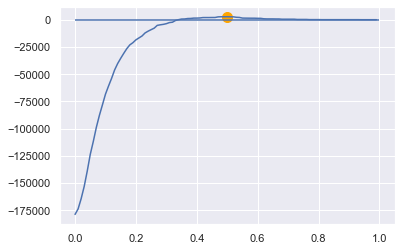

Maximum benefit at cutoff 0.5 with revenue delta of $2,750.02


In [67]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})

def plot_tradeoff(rev_deltas: pd.Series):
    # Plot the revenue deltas
    rev_deltas.plot()
    # Mark optimal point
    max_pred = rev_deltas.idxmax()
    plt.scatter(max_pred, rev_deltas.loc[max_pred], s=100, c='orange')
    # Reference line for break-even
    plt.hlines(0, 0, 1)
    plt.show()
    print(f'Maximum benefit at cutoff {max_pred} with revenue delta of ${rev_deltas.loc[max_pred]:,.2f}')

plot_tradeoff(rev_deltas)

## Optional extra: how to select the cut-off?

The approach of offering discounts based on a churn probability cut-off may not be the most optimal strategy.

- For example, we could end up offering discounts to customers who are not very profitable, which could significantly reduce our overall margins. In such cases, if offering a discount results in a customer becoming unprofitable on a net margin basis, it might be better to let them churn instead of trying to retain them.
- Even if we focus solely on revenue, this strategy may still not be optimal. Instead, we could calculate the expected revenue impact of our discount strategy and prioritize offering discounts to customers with a high potential revenue impact. These customers might have a high probability of churning, but they could also be valuable, justifying the extra effort to retain them.

The key idea is that we can afford to spend more on retaining high-value customers, as the cost of losing them is much greater. A common mistake in churn management is to focus only on churn probability, while overlooking the value of the customer. In many cases, businesses spend as much effort on retaining unprofitable customers as they do on retaining those who are highly profitable.

In [68]:
def get_rev_delta_high_value(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2, min_rev: float=500):
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff and rev
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given for high-value customers => customer stays for full year, independent
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[(pred['churn_probability'] >= cutoff) & (pred['basecase_revenue'] > min_rev),
    'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

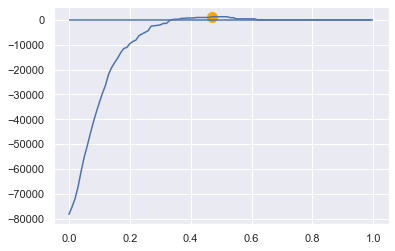

Maximum benefit at cutoff 0.47000000000000003 with revenue delta of $1,250.52


In [70]:
## Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas_high_value = pd.Series({cutoff: get_rev_delta_high_value(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
plot_tradeoff(rev_deltas_high_value)

<b>Note :</b>
1. In this case, prioritizing high-revenue customers doesn't make much sense, as the overall revenue delta is smaller compared to targeting all customers. This is mainly because the intervention here only involves adjusting prices, which doesn't depend on the number of customers. In typical churn prevention strategies, however, interventions go beyond just price adjustments.
2. There may also be an option to enhance customer relations, such as assigning key account managers or implementing other cost-incurring interventions. In such cases, it could be more beneficial to target only a select group of customers in order to save on these additional costs, even if the revenue delta is lower as a result.

## Optional extra: Using forecast rather than actual churn
We observed earlier that we used actual churn outcomes to calculate the financial impact. Actual outcomes are useful for retrospective analysis, also known as "backtesting," where we assess how well a strategy would have performed in the past.

However, it's important to ensure that the analysis is conducted using out-of-sample data. If we use the training data, the results will likely be overly optimistic.

In real-world situations, actual churn outcomes might not be available since they are future events. An alternative approach is to optimize predicted/forecast revenue based on the churn probabilities from our model. Here, instead of using actual churn outcomes, we replace them with the predicted probabilities of churn.

The quality of this approach depends on the accuracy of the model. If the model probabilities are poorly calibrated, the results could be inaccurate. Therefore, when following this approach, it's necessary to check how well calibrated the model probabilities are and, if needed, correct for any miscalibration using techniques like Platt scaling, sigmoid calibration, or isotonic regression.

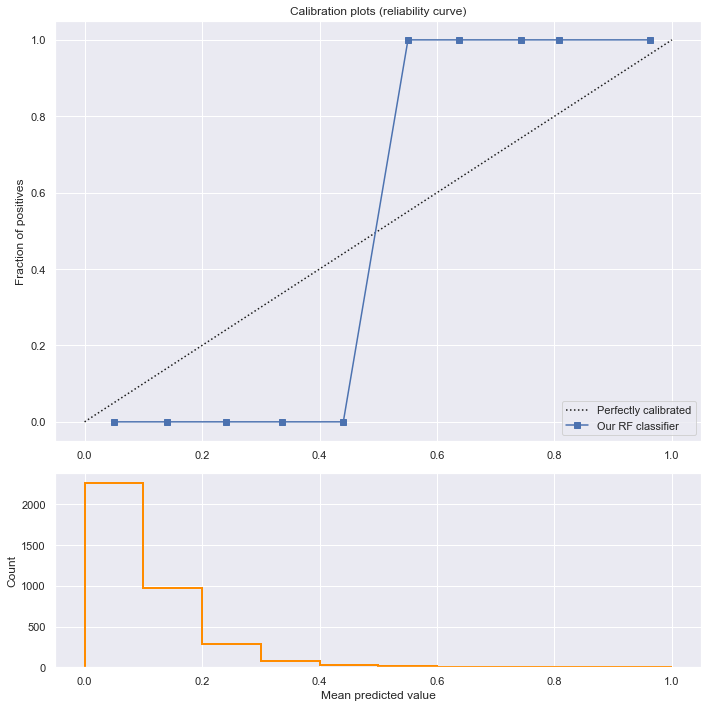

In [71]:
# Check our calibration

from sklearn.calibration import calibration_curve

fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_true=test_data['churn'],
    y_prob=test_data['churn_probability'],
    n_bins=10
)
ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="Our RF classifier")
ax2.hist(test_data['churn_probability'], range=(0, 1), bins=10, color='darkorange', histtype="step", lw=2)
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots (reliability curve)')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
plt.tight_layout()

This chart provides the following insights:

1. The top calibration curve shows a sigmoid shape, which is typical of an under-confident classifier.
2. The bottom chart indicates that the model tends to predict higher probabilities, possibly because it lacks confidence in its predictions.

In [72]:
# Electricity evenue for each customer consists of energy consumption (amount * price) and the meter rent
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more d
# Note that we need to reverse the log10-transformation from the data cleaning step

test_data['basecase_revenue'] = np.power(10, test_data['forecast_cons_12m']) * test_data['forecast_price_energy_off_peak'] + test_data['forecast_meter_rent_12m']
# Taking churn into account
test_data['basecase_revenue_after_churn'] = test_data['basecase_revenue'] * (1 - 0.919 * test_data['churn_probability'])

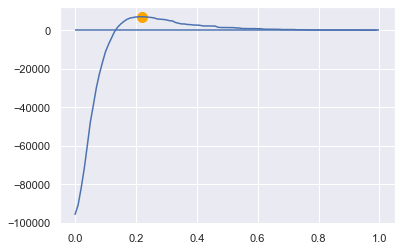

Maximum benefit at cutoff 0.22 with revenue delta of $6,994.43


In [73]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
plot_tradeoff(rev_deltas)